<a href="https://colab.research.google.com/github/yrlmzmerve/Open_CV_Tutorial/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection

Dijital görüntü / videolarda belirli bir sınıftaki (insanlar, binalar, arabalar.. ) anlamsal nesnelerin örneklerini anlamakla ilgilenen, bilgisayarla görme ve görüntü işleme ile ilgili bir teknolojidir


Amaç görüntü üzerinde bulunan nesnenin koordinatlarının, genişlik ve yükseklik değerlerinin bulunmasıdır

### 1. Kenar Algılama

Görüntü parlaklığının keskin bir biçimde değiştiği noktaları tanımlamayı amaçlayan yöntem

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1199.5, 1199.5, -0.5))

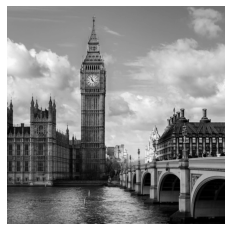

In [2]:
# resmi içe aktar
img = cv2.imread("london.jpg", 0)
plt.figure(), plt.imshow(img, cmap = "gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1199.5, 1199.5, -0.5))

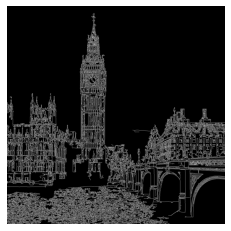

In [3]:
edges = cv2.Canny(image = img, threshold1 = 0, threshold2 = 255)
plt.figure(), plt.imshow(edges, cmap = "gray"), plt.axis("off")

In [4]:
med_val = np.median(img)
print(med_val)

140.0


In [5]:
low = int(max(0, (1 - 0.33)*med_val))
high = int(min(255, (1 + 0.33)*med_val))

In [6]:
print(low)
print(high)

93
186


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1199.5, 1199.5, -0.5))

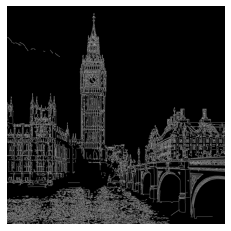

In [7]:
edges = cv2.Canny(image = img, threshold1 = low, threshold2 = high)
plt.figure(), plt.imshow(edges, cmap = "gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1199.5, 1199.5, -0.5))

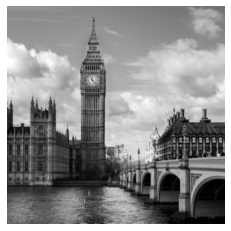

In [8]:
# blur
blurred_img = cv2.blur(img, ksize = (5,5))
plt.figure(), plt.imshow(blurred_img, cmap = "gray"), plt.axis("off")

In [9]:
med_val = np.median(blurred_img)
print(med_val)

139.0


In [10]:
low = int(max(0, (1 - 0.33)*med_val))
high = int(min(255, (1 + 0.33)*med_val))

In [11]:
print(low)
print(high)

93
184


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1199.5, 1199.5, -0.5))

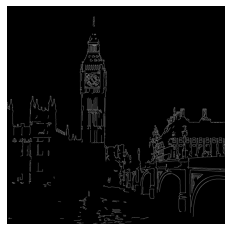

In [12]:
edges = cv2.Canny(image = blurred_img, threshold1 = low, threshold2 = high)
plt.figure(), plt.imshow(edges, cmap = "gray"), plt.axis("off")

### 2. Köşe Algılama

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(294, 316)


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 315.5, 293.5, -0.5))

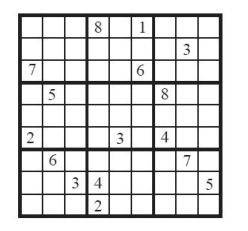

In [14]:
# resmi içe aktar
img = cv2.imread("sudoku.jpg", 0)
img = np.float32(img)
print(img.shape)
plt.figure(), plt.imshow(img, cmap = "gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 315.5, 293.5, -0.5))

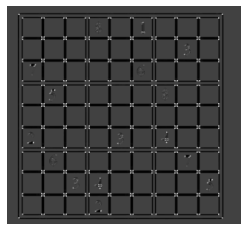

In [15]:
# harris corner detection
dst = cv2.cornerHarris(img, blockSize = 2, ksize = 3, k = 0.04)
plt.figure(), plt.imshow(dst, cmap = "gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 315.5, 293.5, -0.5))

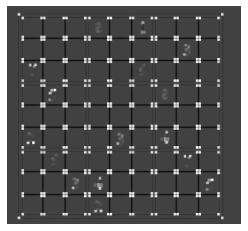

In [16]:
dst = cv2.dilate(dst, None)
img[dst>0.2*dst.max()] = 1
plt.figure(), plt.imshow(dst, cmap = "gray"), plt.axis("off")

In [17]:
# shi tomasi detection
img = cv2.imread("sudoku.jpg", 0)
img = np.float32(img)
corners = cv2.goodFeaturesToTrack(img, 120, 0.01, 10)
corners = np.int64(corners)

In [18]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(img, (x,y),3,(125,125,125),cv2.FILLED)

(-0.5, 315.5, 293.5, -0.5)

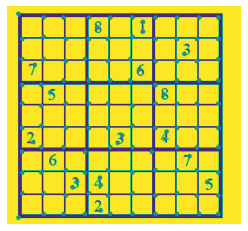

In [19]:
plt.imshow(img)
plt.axis("off")

### 3. Kontur Algılama

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 450.5, 281.5, -0.5))

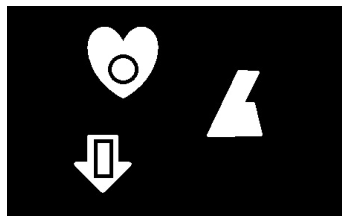

In [21]:
# resmi içe aktar
img = cv2.imread("contour.jpg",0)
plt.figure(), plt.imshow(img, cmap = "gray"), plt.axis("off")

In [22]:
# farklı sürüm için 
# image, contours, hierarch = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [23]:
contours, hierarch = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [24]:
external_contour = np.zeros(img.shape)
internal_contour = np.zeros(img.shape)

In [25]:
for i in range(len(contours)):
    
    # external
    if hierarch[0][i][3] == -1:
        cv2.drawContours(external_contour,contours, i, 255, -1)
    else: # internal
        cv2.drawContours(internal_contour,contours, i, 255, -1)

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 450.5, 281.5, -0.5))

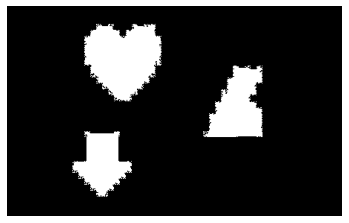

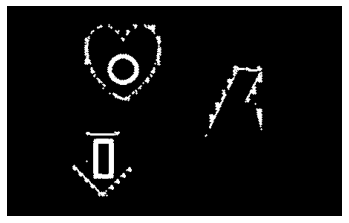

In [26]:
plt.figure(), plt.imshow(external_contour, cmap = "gray"),plt.axis("off")
plt.figure(), plt.imshow(internal_contour, cmap = "gray"),plt.axis("off")

### 4. Renk ile Nesne Tespiti

### 5. Şablon Eşleme

### 6. Özellik Eşleme

### 7. Havza Algoritması

### 8. Yüz Tanıma 